# Week 1 Assignment
## MBP 1201 - Introductory Biostatistics


## Submission format
This assignment should be submitted on Quercus by Sept 26, 11:59 pm.

Your submission should consist of a single file:

1. `FIRSTNAME_LASTNAME.STUDENTNUMBER.ipynb` containing all of the Python code you’ve used to generate your plots and results, as well as plain-text answers to questions that require an explanation. 

## Data
The dataset contains information about ~ 40,000 diamonds, their cuts, their prices, and other information about them. The data itself can be downloaded from the `diamonds-data.tsv` file on Quercus. The decription for the columns in the data are below.

| Column name | Description                                                                                       |
| -           | -                                                                                                 |
| `price`     | price in US dollars                                                                               |
| `carat`     | weight of the diamond                                                                             |
| `cut`       | quality of the cut (Good, Premium, Ideal)                                                         |
| `color`       | diamond colour, from D (best) to J (worst)                                                        |
| `clarity`     | a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) |
| `x`           | length in mm                                                                                      |
| `y`           | width in mm                                                                                       |
| `z`           | depth in mm                                                                                       |
| `depth`       | total depth percentage $$ = z / {\rm mean}(x, y) = 2z / (x + y)$$                                 |
| `table`       | width of top of diamond relative to widest point                                                  |

To generate plots for this assignment, you can use either `matplotlib` or `seaborn` depending on what works best for the given problem. 

## Exercise 1: Looking at your data
1. Plot a histogram of the diamond prices. (3 marks)
* Make sure to label your axes and specify the units of the values shown on each axes.
* Use the “square root rule” to set the number of bins to be the square root of the number of samples.
2. Re-plot the data using many fewer and many more bins. What is the effect of the number of bins on the appearance of your histogram? (2 marks)

### Hints:
* Look up the parameters of the relevant matplotlib (plt.hist) or seaborn (sns.histplot) functions!
* (Optional) Assign all your plotting statements (except for plt.show()) to the dummy variable _ so as to prevent extra output from being displayed.

In [1]:
# load modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
# load data
df = pd.read_csv('diamonds-data.tsv', sep='\t')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


- Problem 1

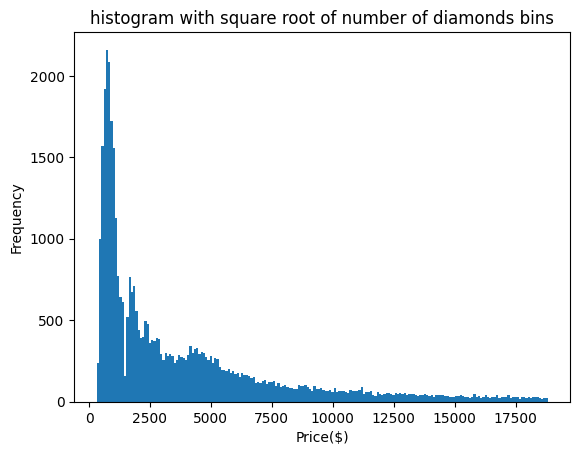

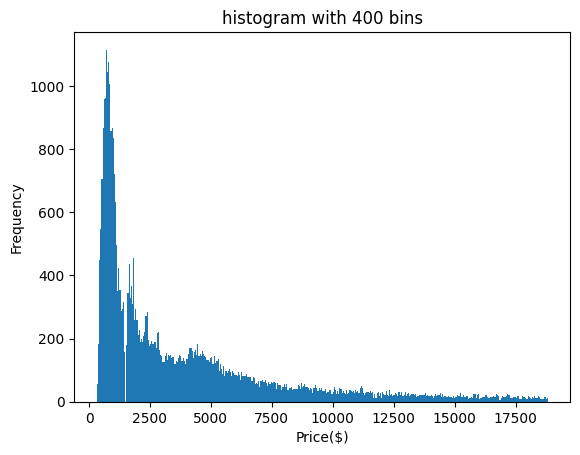

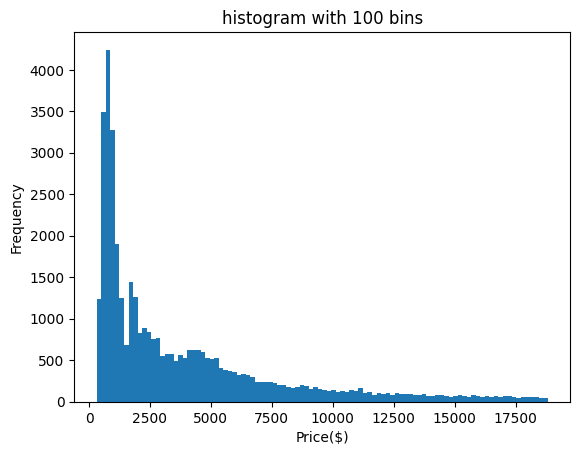

In [3]:
price = df['price']
# set bins with sqrt of number of diamonds
_, _, _ = plt.hist(price, bins=int(np.sqrt(len(price))))
plt.xlabel('Price($)')
plt.ylabel('Frequency')
plt.title('histogram with square root of number of diamonds bins')
plt.show()

# change number of bins
_, _, _ = plt.hist(price, bins=400)
plt.xlabel('Price($)')
plt.ylabel('Frequency')
plt.title('histogram with 400 bins')
plt.show()

_, _, _ = plt.hist(price, bins=100)
plt.xlabel('Price($)')
plt.ylabel('Frequency')
plt.title('histogram with 100 bins')
plt.show()

- Problem 2\
With the change of the number of bins, the price will be divided into that number of bins. **The more the bins are, the histogram will be more smooth and able 
to represent the true data distribution of the price of diamonds and vice versa.** But the more bins will also cause difficulties in identifying the noise of the data.


## Exercise 2: Plot an empirical cumulative distribution function with percentiles
1. Write a function that takes as input a 1D array of data and then returns the $x$ and $y$ values of the ECDF. (2 marks)
2. Use this function to superimpose plots of ECDFs of the price of the 3 different cuts of diamonds (Good, Premium and Ideal). (3 marks)
* Remember to annotate your plot (label the axes and include a legend)
* Calculate the 1st quartile, median, and 3rd quartile of each class of data.
3. What is the probability of the price of any diamond being valued <= $4500? (2 marks)

- Problem 1

In [4]:
def ECDF(Y):
    """
    Function to calculate ECDF of an array Y
    """
    x = np.array(Y, copy=True)
    # sort Y
    x.sort()
    
    # get frequency
    x, count = np.unique(x, return_counts=True)
    
    # calculate PMF
    pmf = count / np.sum(count)
    
    # calculate ECDF
    y = np.cumsum(pmf)
    
    return x, y
    # return (x, y) components of ECDF

- Probelm 2

Good cut: 
	1st quartile: 1145.0
	median: 3050.5
	3rd quartile: 5028.0
Premium cut: 
	1st quartile: 1046.0
	median: 3185.0
	3rd quartile: 6296.0
Ideal cut: 
	1st quartile: 878.0
	median: 1810.0
	3rd quartile: 4678.5


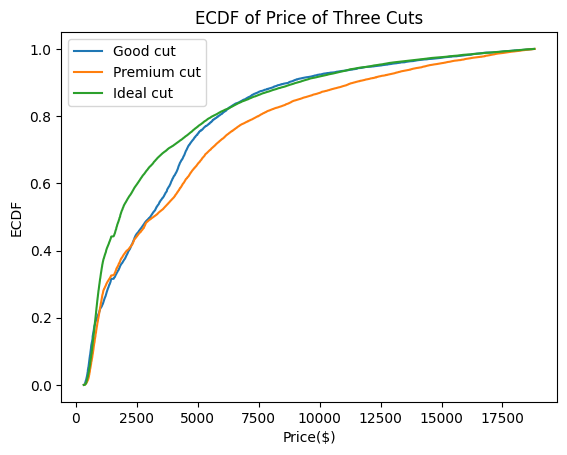

In [5]:
# plot Good cut
good = df['price'][df['cut'] == 'Good']
ecdf_good_x, ecdf_good_y = ECDF(good)
_ = plt.plot(ecdf_good_x, ecdf_good_y)


# 1st quartile, median, and 3rd quartile of Good cut
ret_good = np.quantile(good, [0.25, 0.5, 0.75])
print(f'Good cut: \n\t1st quartile: {ret_good[0]}\n\tmedian: {ret_good[1]}\n\t3rd quartile: {ret_good[-1]}')

# plot Premium cut
premium = df['price'][df['cut'] == 'Premium']
ecdf_premium_x, ecdf_premium_y = ECDF(premium)
_ = plt.plot(ecdf_premium_x, ecdf_premium_y)
plt.xlabel('Price($)')
plt.ylabel('ECDF')

# 1st quartile, median, and 3rd quartile of Premium cut
ret_premium = np.quantile(premium, [0.25, 0.5, 0.75])
print(f'Premium cut: \n\t1st quartile: {ret_premium[0]}\n\tmedian: {ret_premium[1]}\n\t3rd quartile: {ret_premium[-1]}')

# plot Ideal cut
ideal = df['price'][df['cut'] == 'Ideal']
ecdf_ideal_x, ecdf_ideal_y = ECDF(ideal)
_ = plt.plot(ecdf_ideal_x, ecdf_ideal_y)
plt.xlabel('Price($)')
plt.ylabel('ECDF')
plt.legend(['Good cut', 'Premium cut', 'Ideal cut'])
plt.title('ECDF of Price of Three Cuts')
# 1st quartile, median, and 3rd quartile of Ideal cut
ret_ideal = np.quantile(ideal, [0.25, 0.5, 0.75])
print(f'Ideal cut: \n\t1st quartile: {ret_ideal[0]}\n\tmedian: {ret_ideal[1]}\n\t3rd quartile: {ret_ideal[-1]}')
plt.show()

- Problem 3

In [6]:
all_x, all_y = ECDF(df['price'])
prob = all_y[all_x == 4500]
print(f'The probability of the price of any diamond being valued <= $4500: {prob}')

The probability of the price of any diamond being valued <= $4500: [0.69014609]


## Exercise 3: Comparing a theoretical normal distribution to our empirical data
1. Compute the mean and standard deviation of the price of all the diamonds. (1 mark)
2. Generate 10,000 random samples from a normal distribution with that mean and that standard deviation. Plot a histogram of the samples. (1 mark)
3. Plot the empirical CDF (using your function from Exercise 2.1) of the price data along with the CDF of the theoretical normal distribution (using the generated random samples) on the same plot. (1 mark)
4. Do your data appear to be normally distributed? Why or why not? (1 mark)

- Problem 1

In [7]:
mean = np.mean(df['price'])
std = np.std(df['price'])
print(f'mean and standrd deviation of price: {mean, std}')

mean and standrd deviation of price: (3901.06325780163, 4020.4467787002727)


- Problem 2

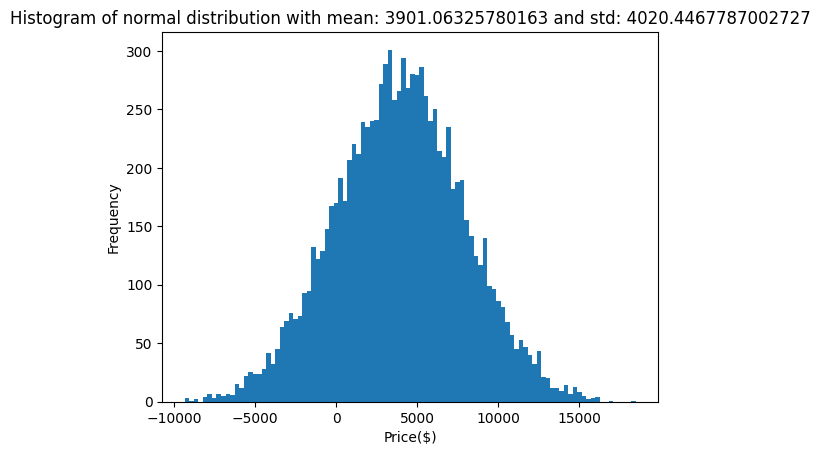

In [8]:
normal = np.random.normal(mean, std, 10000)
_, _, _ = plt.hist(normal, bins=int(np.sqrt(len(normal))))
plt.xlabel('Price($)')
plt.ylabel('Frequency')
plt.title(f'Histogram of normal distribution with mean: {mean} and std: {std}')
plt.show()

- Problem 3

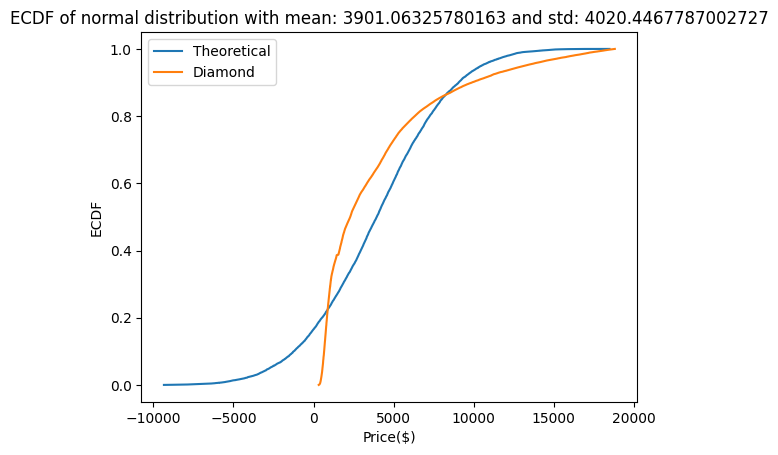

In [9]:
normal_x, normal_y = ECDF(normal)
_ = plt.plot(normal_x, normal_y)
_ = plt.plot(all_x, all_y)
plt.xlabel('Price($)')
plt.ylabel('ECDF')
plt.title(f'ECDF of normal distribution with mean: {mean} and std: {std}')
plt.legend(['Theoretical', 'Diamond'])
plt.show()

- Problem 4

**I think our data does not satisfy the normal distribution.** Compared to the ECDF plot of theoretical normal distribution, the plot of price data over the whole domain does not follow the pattern and "S" shape of the traditional normal distribution. This indicates that the distribution of price data is not similar to the theoretical normal distribution. Indeed, the data is not normally distributed.

## Exercise 4: Theoretical probability density functions
Which of the following are valid probability density functions with domain $\mathbb{R}$? Justify your answer. (1 mark each). 

I. $f(x) = {1\over \sigma \sqrt{2\pi}}e^{-{(x + 7)^2 \over 2\sigma^2}}$, $\sigma \leq 0$

II. $g(x) = {\sin(\pi x) \over \pi x}$. Facts: $\int_{-\infty}^{\infty}g(x)dx = 1$, and we define $g(0) = \lim\limits_{x\to 0}g(x) = 1$.

III. $h(x) = \begin{cases} 1, x \in (-1/2, 1/2) \\ 0, \text{else} \end{cases}$

IV. $l(x) = {\sqrt{\pi}\over 2\sqrt{2\pi}}\left(1 + {x^2 \over 2}\right)^{-3/2}$. Hint: when performing the integral, let $x = \sqrt{2}\tan(\theta)$. For what value of $\theta$ does $\tan(\theta) \to \pm \infty$?

V. (Optional, bonus 1 mark) $m(x) = \begin{cases} 0, x = 0, \pm 1, \pm 2, \ldots \\ {1\over \sqrt{\pi}}e^{-x^2}, \text{else} \end{cases}$

- Problem I\
According to the definition of probability density function, the probablity should always be non-negative. However, $\sigma \leq 0$ but value of $e^{-{(x + 7)^2 \over 2\sigma^2}}$ is always greater than 0, which means the function $f(x)$ is a negative value for $\mathbb{R}$. **Indeed, $f(x)$ is not a valid probability density function.**

- Problem II\
According to the definition of probability density function, the probablity should always be non-negative. However, when x is ${3 \over 2}$, the value of $g(x) = {-2 \over 3 \pi}$ which is a negative value and break the rule of probability density function. **Indeed, $g(x)$ is not a probability density function.**

- Problem III\
As far as I am thinking, $g(x)$ is a valid probability density function. Firstly, with domain $\mathbb{R}$, all function values are within [0, 1] which matches the definition of probability that is non-negative. Secondly, when we calculate the cumulative density function, $P[X \leq x] = \int_{-\infty}^{x}g(x)dx = \begin{cases} 0, (x \leq -1/2) \\ 1, \text{else} \end{cases}$, which means the CDF locates in the range [0, 1] and it matches the definition of valid probability density function. **Indeed, $g(x)$ is a valid probability density function.**

- Problem IV\
After we make some simplification on the original equations, $l(x) = (x^{2}+2)^{-3/2}$. With the domain $\mathbb{R}$, the value of l(x) is always non-negative which matched the first rule of valid probability density function. Then I did the integral of $l(x)$ and the results is $L(x) = \int g(x)dx = {x \over 2 \sqrt{x^{2}+2}}$. Based on the hint, when $x = \sqrt{2}\tan(\theta)$ and $\tan(\theta) \to \pm \infty$, $\theta = k\pi+{\pi \over 2}, k=0, \pm 1, \pm 2, \ldots$. Therefore, $CDF(x) = L(x) = \int_{-\infty}^{\infty} g(x)dx = {\sqrt{2}\tan(\theta) \over 2 \sqrt{(\sqrt{2}\tan(\theta))^{2}+2}} = {\tan(\theta) \over 2 \sqrt{\tan^{2}(\theta)+1}} = {\tan(\theta) \over 2 \sec(\theta)} = {\sin(\theta) \over 2} = \sin({\pi \over 2}) - \sin({- {\pi \over 2}}) = 0.5 - (-0.5) = 1$. This means l(x) matches the second rule of valid probability density function which the integral is 1. **Indeed, $l(x)$ is a valid probability density function.**

- Problem V Bonus\
Firstly, a valid probability density function should always be non-negative. Since the value of $e^{-{x^{2}}}$ is always non-negative for all x in the domain $\mathbb{R}$, this probability density function $m(x)$ is always non-negative.\
Secondly, a valid probability density function should satisfy $\int_{-\infty}^{\infty} m(x)dx = 1$. In order to solve the integral $\int_{-\infty}^{\infty} {1\over \sqrt{\pi}}e^{-x^2}dx$, we let $I = \int_{-\infty}^{\infty} {1\over \sqrt{\pi}}e^{-x^2}dx$. It is rational to know that $I^{2} = {1 \over \pi}\int_{-\infty}^{\infty} {\int_{-\infty}^{\infty} e^{-x^2}}e^{-y^2}dxdy$. Next, we replace the $x, y$ with the polar coordinates $\theta$ and $r$ and solve the integral. $I^{2} = {1 \over \pi}\int_{0}^{\infty}{\int_{0}^{2\pi} e^{-r^2}}rd\theta dr = -{1 \over \pi} ({2 \pi} {e^{-r^2} \over 2})|_{0}^{\infty} = 1$. Therefore $I^{2} = 1$. Since the ${1\over \sqrt{\pi}}e^{-x^2}$ is non-negative for the domain $\mathbb{R}$ and the integral of the function cannot be negative. Therefore, $I = 1$.\
**Indeed,  $m(x)$ is a valid probability density function**